# Praktische Übung 1: Pandas

## Aufgabe 1

1. Laden Sie den Datensatz `automobile.csv` von [GitHub](https://github.com/pabair/ml-kurs-ws22/) aus dem Folder `data` runter.
2. Laden Sie die Daten in diesem Notebook in einen Pandas DataFrame.
3. Schauen Sie sich die Daten an und versuchen Sie zu verstehen was die Daten abbilden.
4. Geben Sie folgende Daten aus:
    1. Eine Liste aller Hersteller.
    2. Wie oft welcher „body-style“ im Datensatz vorhanden ist.
    3. Die fünf Autos mit dem niedrigsten Preis.
    4. Die fünf Autos mit dem höchsten Preis

In [1]:
import pandas as pd

df = pd.read_csv("./data/automobile.csv")

df.head()

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
0,0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0


Aufgabe 1.4 - A

In [2]:
companys = df["company"].unique()
companys

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mitsubishi',
       'nissan', 'porsche', 'toyota', 'volkswagen', 'volvo'], dtype=object)

Aufgabe 1.4 - B

In [3]:
df["body-style"].value_counts()

sedan          32
hatchback      15
wagon           9
convertible     3
hardtop         2
Name: body-style, dtype: int64

1.4 - C

In [4]:
df.sort_values(by="price", ascending = True).head(5)

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
13,16,chevrolet,hatchback,88.4,141.1,l,three,48,47,5151.0
27,36,mazda,hatchback,93.1,159.1,ohc,four,68,30,5195.0
48,66,toyota,hatchback,95.7,158.7,ohc,four,62,35,5348.0
36,49,mitsubishi,hatchback,93.7,157.3,ohc,four,68,37,5389.0
28,37,mazda,hatchback,93.1,159.1,ohc,four,68,31,6095.0


In [5]:
#df["price"].nsmallest(5) 

In [6]:
df.sort_values(by='price', ascending=False).head(5)

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
35,47,mercedes-benz,hardtop,112.0,199.2,ohcv,eight,184,14,45400.0
11,14,bmw,sedan,103.5,193.8,ohc,six,182,16,41315.0
34,46,mercedes-benz,sedan,120.9,208.1,ohcv,eight,184,14,40960.0
46,62,porsche,convertible,89.5,168.9,ohcf,six,207,17,37028.0
12,15,bmw,sedan,110.0,197.0,ohc,six,182,15,36880.0


In [7]:
#df["price"].nlargest(5)

In [8]:
## Aufgabe 2

1. Was ist der durchschnittliche Preis mit Bezug auf den „body-style“ eines Autos?
2. Welches sind die drei „body-styles“ mit den durchschnittlich höchsten Preisen?
3. Welche Companies stellen „hardtop“ als „body-style“ her?
4. Geben Sie alle Autos aus deren Herstellernamen mit "a" oder "b" beginnt ([Hint](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.startswith.html)).
5. Erstellen Sie je einen Scatterplot mit:
    1. Scatterplot mit `x="horsepower"` und `y="average-mileage"`
    2. Scatterplot mit `x="horsepower"` und `y="price"`

Aufgabe 2.1

In [12]:
#average_price = df.groupby("body-style")["price"].mean()
#average_price

# mit Erzeugen eines DataFrames

pricePerStyle = df[["price","body-style"]].groupby("body-style").mean()
pricePerStyle

,price
body-style,
convertible,22341.000000
hardtop,39714.000000
hatchback,7159.571429
sedan,17706.333333
wagon,12730.111111


Aufgabe 2.2

In [15]:
average_price.nlargest(3)

pricePerStyle.sort_values("price", ascending = False).head(3) # als Dataframe

,price
body-style,
hardtop,39714.000000
convertible,22341.000000
sedan,17706.333333


Aufgabe 2.3

In [21]:
df.loc[df['body-style'] == "hardtop"].get("company")

#Alternative von Baier

#
df[df["body-style"]=="hardtop"]["company"]

35    mercedes-benz
45          porsche
Name: company, dtype: object

Aufgabe 2.4

In [22]:
df.loc[df["company"].str.startswith(("a","b"))]

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
0,0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0
5,5,audi,sedan,99.8,177.3,ohc,five,110,19,15250.0
6,6,audi,wagon,105.8,192.7,ohc,five,110,19,18920.0
7,9,bmw,sedan,101.2,176.8,ohc,four,101,23,16430.0
8,10,bmw,sedan,101.2,176.8,ohc,four,101,23,16925.0
9,11,bmw,sedan,101.2,176.8,ohc,six,121,21,20970.0


Aufgabe 2.5

<AxesSubplot:xlabel='horsepower', ylabel='price'>

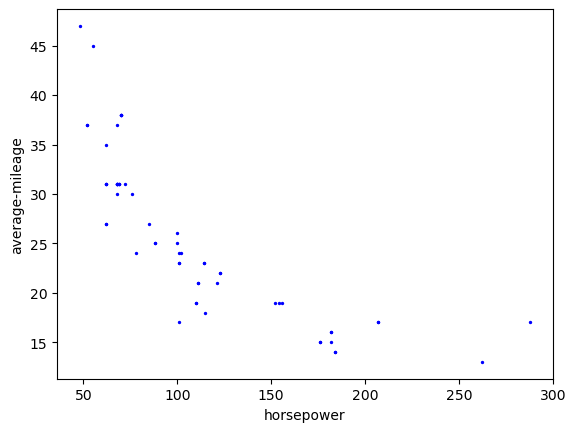

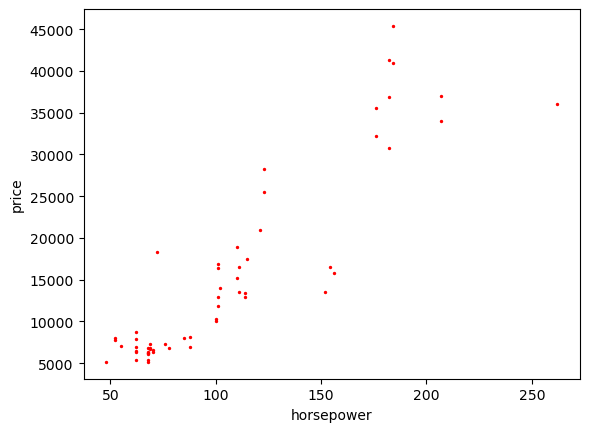

In [23]:
x = "horsepower"
y = "average-mileage"
df.plot.scatter(x, y, s = 2, c = "blue")

df.plot.scatter(x,"price", s = 2, c = "red")

## Aufgabe 3

1. Zusätlich stehen ihnen nachfolgende Informationen zur Verfügung. Erstellen Sie einen zweiten DataFrame, der diese Informationen enthält ([Hint](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html))

|company|country|
|--- |--- |
|alfa-romeo|ITA|
|audi|GER|
|bmw|GER|
|volvo|SWE|
|nissan|JAP|
|mazda|JAP|
2. Verbinden Sie die zwei DataFrames über einen `merge` ([Hint](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html)). Stellen Sie sicher, dass die Datenpunkte welche keine Länderangabe haben nicht verloren gehen.
3. Geben Sie in einem DataFrame aus, wieviel Fahrzeuge pro Land vorhanden sind und wie hoch der Durchschnittspreis pro Land liegt.

Aufgabe 3.1

In [ ]:
company_country = {'company' : ["alfa-romero", "audi", "bmw", "volvo", "nissan", "mazda"], 
        'country' : ["ITA", "GER", "GER","SWE","JAP", "JAP"]}

new_df = pd.DataFrame(data = company_country)

new_df

Aufgabe 3.2

In [ ]:
dataF = pd.merge_ordered(left = df, right = new_df)
dataF.head()

Aufgabe 3.3: 
Geben Sie in einem DataFrame aus, wieviel Fahrzeuge pro Land vorhanden sind und wie hoch der Durchschnittspreis pro Land liegt.

In [ ]:
carsByCountry = dataF.groupby("country")["price"].mean()
carsByCountry

carsByCountryNumber = dataF["country"].value_counts()
#df["body-style"].value_counts()
carsByCountryNumber

df_new = dataF.from_dict(data = [carsByCountry, carsByCountryNumber])
#df_new -> doesn't now work properly

dataF[["country", "price"]].groupby("country").agg(["count", "mean"])

## Bonus

Folgende Aufgaben sind als Bonus gedacht (für diejenigen die mit den vorherigen Aufgaben schon durch sind). Um sie zu lösen muss selbstständig nach den ben¨ptigten Methoden im Internet gesucht werden. 
1. Entfernen Sie die Spalte „body-styles“ vom DataFrame.
2. Erstellen Sie einen neuen DataFrame der 10% zufällig ausgewählte Zeilen aus dem ursprünglichen DataFrame enthält.
3. Fügen Sie die Zeilen des neuen DataFrames an den ursprünglichen DataFrame unten ran.
4. Zählen Sie die Anzahl doppelter Einträge in diesem DataFrame.